## 1. Generate FITS cutout around LMC, from Spitzer MIPS2 HiPS

In [29]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [76]:
from astropy.coordinates import SkyCoord
from hips import WCSGeometry

geometry = WCSGeometry.create(
     skydir=SkyCoord(280.4652, -32.8884, unit='deg', frame='galactic'),
     width=1600, height=1000, fov="2 deg",
     coordsys='icrs', projection='SIN',
)

In [77]:
hips_survey = 'CDS/P/SPITZER/MIPS2'

from hips import make_sky_image
result = make_sky_image(geometry, hips_survey, 'fits')

Drawing tiles: 100%|██████████| 23/23 [00:01<00:00, 14.75it/s]


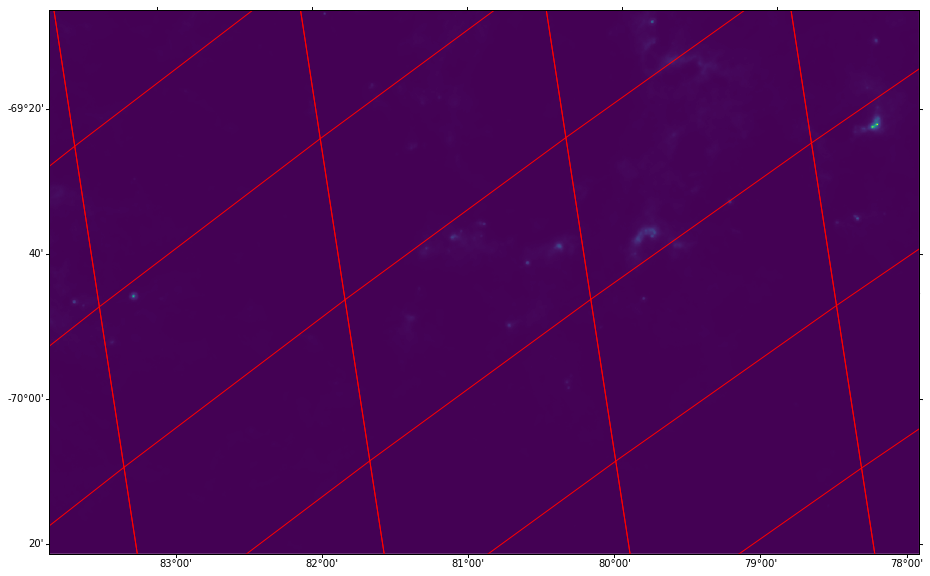

In [78]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20, 10))

result.plot()

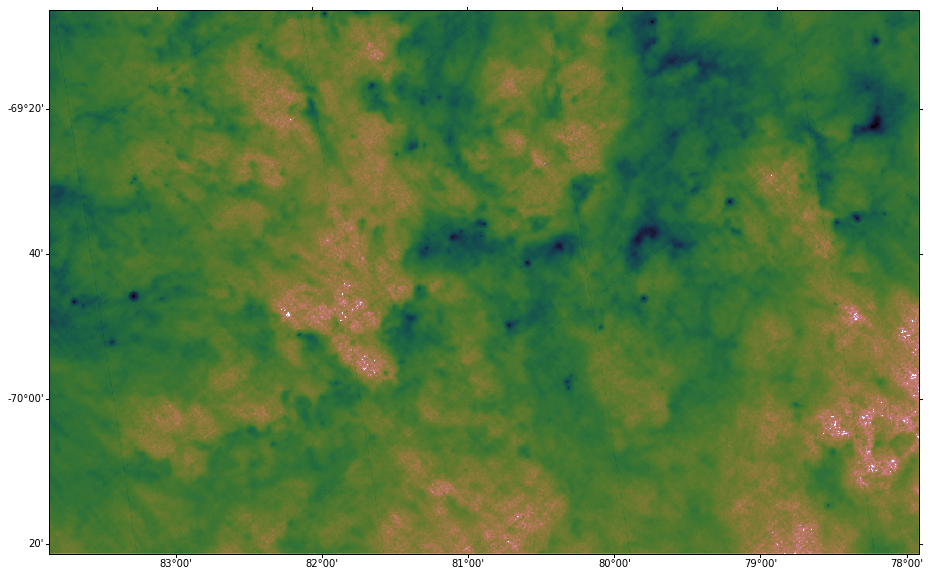

In [88]:
from matplotlib.colors import LogNorm

plt.figure(figsize = (20, 10))
plt.subplot(projection=result.geometry.wcs)
plt.imshow(result.image, norm=LogNorm(), cmap=plt.cm.cubehelix_r, origin='lower')


In [86]:
result.write_image('my_image.fits')

## 2. Generate JPEG image of galactic plane as seen by Fermi

In [104]:
geometry = WCSGeometry.create(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=3000, height=1000, fov='30 deg',
     coordsys='galactic', projection='AIT',
)

In [105]:
hips_survey = 'CDS/P/Fermi/color'

from hips import make_sky_image
result = make_sky_image(geometry, hips_survey, tile_format='jpg')

Drawing tiles: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]


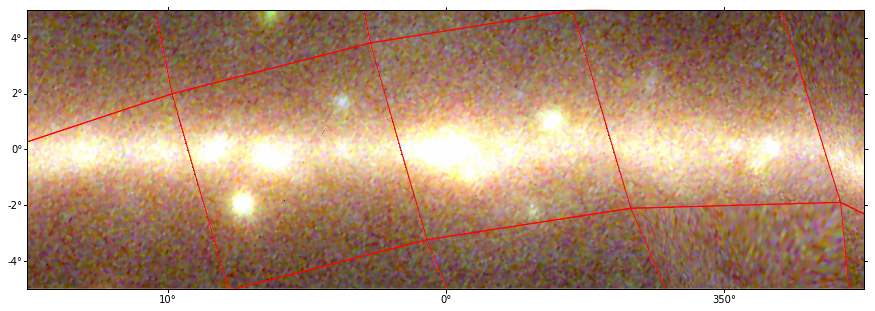

In [106]:
plt.figure(figsize = (15, 8))
result.plot()

In [107]:
result.write_image('Fermi.jpg')